In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\arunj\Desktop\Time Series Project\jupiter notebook\DollarFullDate.csv")
df

,Date,Dollar_Rate
0,"Dec 25, 2022",82.717
1,"Dec 18, 2022",82.780
2,"Dec 11, 2022",82.706
3,"Dec 04, 2022",82.410
4,"Nov 27, 2022",81.410
...,...,...
8387,"Jan 02, 1980",8.000
8388,"Dec 31, 1979",8.000
8389,"Dec 28, 1979",8.000
8390,"Dec 27, 1979",8.100


In [3]:
df = df[::-1]

In [4]:
# import matplotlib.pyplot as plt

# # Plot a line chart
# plt.plot(df['Date'], df['Dollar_Rate'],color="g")
# plt.xlabel('Dates')
# plt.ylabel('Dollar_Rate')
# plt.title('Visualization of data collected')
# plt.show()

In [5]:
# preprocess the dataset
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.groupby(df.Date.dt.year)['Dollar_Rate'].mean()

Date
1979     8.060000
1980     7.886773
1981     8.680717
1982     9.484741
1983    10.104104
1984    11.346520
1985    12.331840
1986    12.596733
1987    12.946865
1988    13.899522
1989    16.202948
1990    17.490593
1991    22.792908
1992    29.575958
1993    31.438504
1994    31.372985
1995    32.405908
1996    35.372609
1997    36.322454
1998    41.274531
1999    43.058154
2000    44.938262
2001    47.175519
2002    48.570885
2003    46.542115
2004    45.242332
2005    44.051212
2006    45.197077
2007    41.187318
2008    43.418168
2009    48.293410
2010    45.994000
2011    46.654615
2012    53.368396
2013    58.618404
2014    61.012288
2015    64.160596
2016    67.199404
2017    65.020358
2018    68.475212
2019    70.384654
2020    74.166115
2021    73.919404
2022    78.676904
Name: Dollar_Rate, dtype: float64

In [7]:
df = df.set_index('Date')
df = df.dropna()


In [8]:
df

,Dollar_Rate
Date,
1979-12-26,8.140
1979-12-27,8.100
1979-12-28,8.000
1979-12-31,8.000
1980-01-02,8.000
...,...
2022-11-27,81.410
2022-12-04,82.410
2022-12-11,82.706


In [9]:
# import matplotlib.pyplot as plt

# # Plot a line chart
# plt.plot( df['Dollar_Rate'],color="r")
# plt.xlabel('Dates')
# plt.ylabel('Dollar_Rate')
# plt.title('Dataset after Preprocessing')
# plt.show()

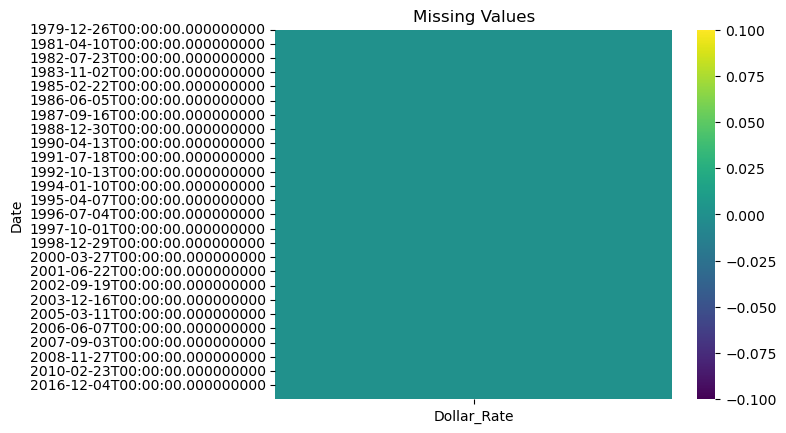

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap to visualize missing values
sns.heatmap(df.isnull(), cmap='viridis')

# Display the plot
plt.title('Missing Values')
plt.show()

In [11]:
# create train and test data
train_data = df[:int(0.8*len(df))]
test_data = df[int(0.8*len(df)):]


In [12]:
train_data.shape,test_data.shape

((6713, 1), (1679, 1))

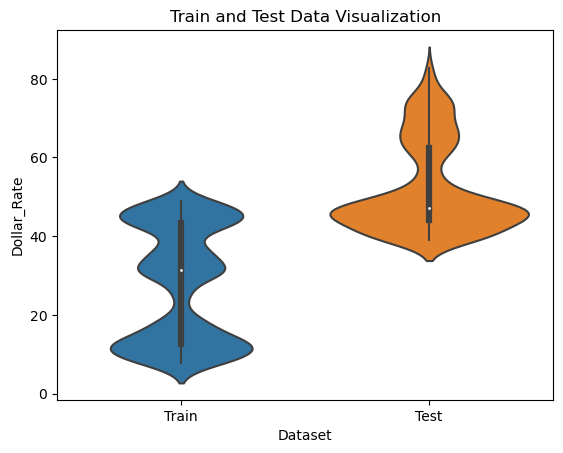

In [13]:
# Combine train and test datasets into a single DataFrame
combined_data = pd.concat([train_data, test_data], keys=['Train', 'Test'])

# Plot violin plot for a specific variable
sns.violinplot(x=combined_data.index.get_level_values(0), y=combined_data['Dollar_Rate'])
plt.xlabel('Dataset')
plt.ylabel('Dollar_Rate')
plt.title('Train and Test Data Visualization')
plt.show()

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6713 entries, 1979-12-26 to 2006-02-28
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dollar_Rate  6713 non-null   float64
dtypes: float64(1)
memory usage: 104.9 KB


In [15]:
# scale the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


In [16]:
# split data into X and y
X_train = []
y_train = []
for i in range(12, len(train_data)):
    X_train.append(train_data_scaled[i-12:i, :])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(12, len(test_data)):
    X_test.append(test_data_scaled[i-12:i, :])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)


In [17]:
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

In [18]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
419/419 [==============================] - 24s 14ms/step - loss: 0.0089
Epoch 2/10
419/419 [==============================] - 3s 8ms/step - loss: 4.2196e-05
Epoch 3/10
419/419 [==============================] - 3s 7ms/step - loss: 3.9313e-05
Epoch 4/10
419/419 [==============================] - 3s 7ms/step - loss: 4.1090e-05
Epoch 5/10
419/419 [==============================] - 3s 8ms/step - loss: 4.0266e-05
Epoch 6/10
419/419 [==============================] - 5s 11ms/step - loss: 4.0678e-05
Epoch 7/10
419/419 [==============================] - 7s 18ms/step - loss: 4.1769e-05
Epoch 8/10
419/419 [==============================] - 9s 22ms/step - loss: 4.1267e-05
Epoch 9/10
419/419 [==============================] - 7s 16ms/step - loss: 3.8582e-05
Epoch 10/10
419/419 [==============================] - 6s 14ms/step - loss: 3.8643e-05


In [20]:
# make predictions on test data
#y_pred = model.predict(X_test)


In [21]:
# Evaluate the model on test data
#mse= model.evaluate(X_test, y_test)
#print(f"Mean squared error on test data: {mse:.4f}")

# Make predictions on test data
y_pred_lstm = model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

53/53 [==============================] - 2s 4ms/step


In [22]:
from sklearn.metrics import r2_score

print("The R2 Score of LSTM model is:",r2_score(y_pred_lstm,y_test)*100)

The R2 Score of LSTM model is: 98.91733205271798


In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [24]:
# Evaluate the bidirectional LSTM model
mse_bidirectional = mean_squared_error(y_test, y_pred_lstm)
rmse_bidirectional = sqrt(mse_bidirectional)
mae_bidirectional = mean_absolute_error(y_test, y_pred_lstm)

print("\nBidirectional LSTM Model Evaluation:")
print("Mean Squared Error (MSE):", mse_bidirectional)
print("Root Mean Squared Error (RMSE):", rmse_bidirectional)
print("Mean Absolute Error (MAE):", mae_bidirectional)
print("The R2 Score of Bidirectional LSTM Model is:",r2_score(y_pred_lstm,y_test)*100)


Bidirectional LSTM Model Evaluation:
Mean Squared Error (MSE): 1.6576191513669174
Root Mean Squared Error (RMSE): 1.2874855926832414
Mean Absolute Error (MAE): 0.8414459617720008
The R2 Score of Bidirectional LSTM Model is: 98.91733205271798


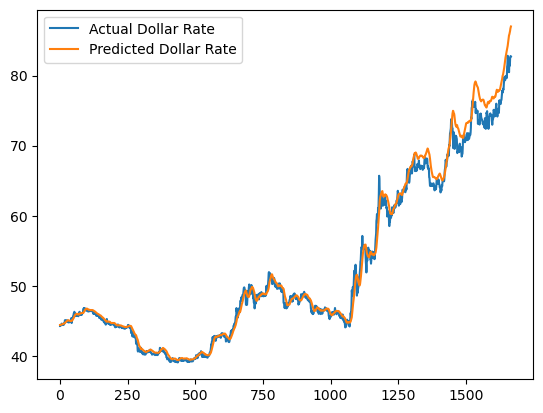

In [25]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual Dollar Rate')
plt.plot(y_pred_lstm, label='Predicted Dollar Rate')
plt.legend()
plt.show()

In [26]:
test = X_test[-12:][1]

In [27]:
test = test.reshape(1,12,1)

In [28]:
pred_values = []
for i in range(5):
    predicted = model.predict(test)
    test = test[:,1:,:]
    test = np.append(test,predicted[-1,-1])
    pred_values.append(predicted[-1,-1])
    test = test.reshape(1,12,1)

1/1 [==============================] - 0s 18ms/step


In [29]:
pred_values = np.array(pred_values)
pred_values = scaler.inverse_transform(pred_values.reshape(-1,1))

In [30]:
pred_values

array([[84.83485 ],
       [85.392395],
       [86.04622 ],
       [86.74675 ],
       [87.49947 ]], dtype=float32)

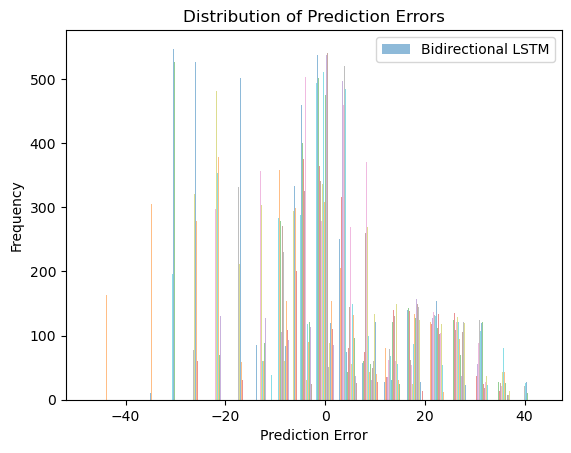

In [31]:
# Calculate the prediction errors
error_bidirectional = y_test - y_pred_lstm.flatten()
plt.hist(error_bidirectional, bins=20, alpha=0.5, label='Bidirectional LSTM')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.legend()
plt.show()